In [2]:
import tensorflow as tf
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataFrame=pd.read_excel("merc.xlsx")
dataFrame.head(6)

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2


In [4]:
#.describe() ile anlamaya çalışımak
dataFrame.describe()
#nan veri var mı
dataFrame.isnull().sum()
#tüm hücreler doluymuş, boş olan hücre sayısı veri sayısına göre çok az olsaydı
#ortalama bir değer ile doldurabilirdik

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

C:\Users\_S1n4n_\.conda\envs\tenserflow\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\_S1n4n_\.conda\envs\tenserflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

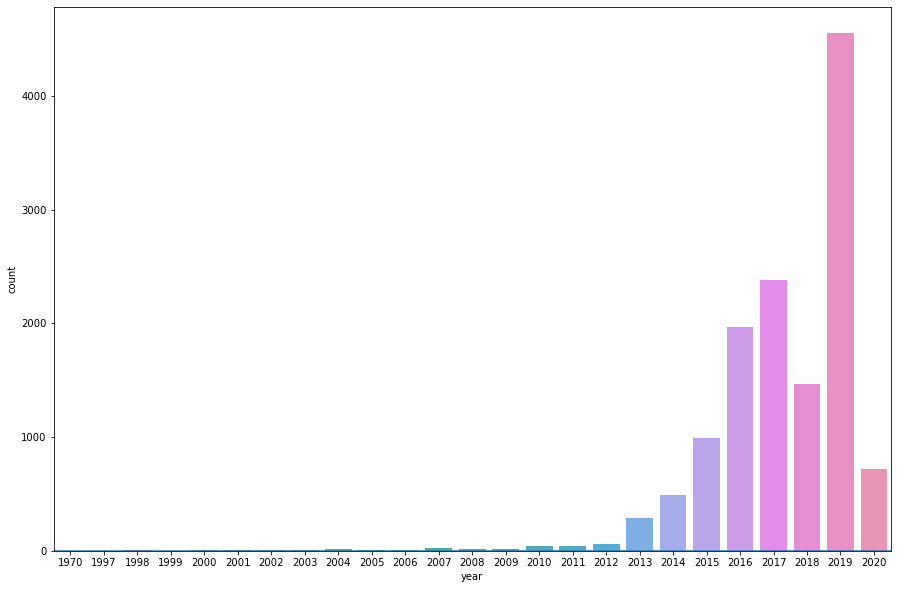

In [5]:
plt.figure(figsize=(15,10))
sbn.distplot(dataFrame["price"])#75000den fazlasını veriden çıkartıcam
sbn.countplot(dataFrame["year"])#belki 2010dan öncesini silerim
 

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64


<AxesSubplot:xlabel='mileage', ylabel='price'>

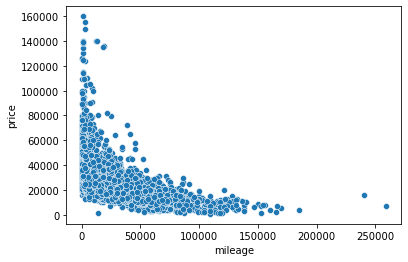

In [6]:
#dataFrame.corr() bu kod her sütunun birbiri ile olan ilişkisini gösterir
#sort_values() bu kod küçükten büyüğe sıralar 
print(dataFrame.corr()["price"].sort_values())
sbn.scatterplot(x="mileage",y="price",data=dataFrame)

mileage ve mpg  fiyat le ters orantılı
yıl ve motor boyutu fiyat ile doğru orantılı

               year         price        mileage           tax           mpg  \
count  12988.000000  12988.000000   12988.000000  12988.000000  12988.000000   
mean    2017.281876  24074.926933   22132.741146    129.689714     55.437142   
std        2.228515   9866.224575   21196.776401     65.183076     15.025999   
min     1970.000000    650.000000       1.000000      0.000000      1.100000   
25%     2016.000000  17357.500000    6322.000000    125.000000     45.600000   
50%     2018.000000  22299.000000   15369.500000    145.000000     56.500000   
75%     2019.000000  28706.000000   31982.250000    145.000000     64.200000   
max     2020.000000  65990.000000  259000.000000    580.000000    217.300000   

         engineSize  
count  12988.000000  
mean       2.050901  
std        0.532596  
min        0.000000  
25%        1.675000  
50%        2.000000  
75%        2.100000  
max        6.200000  


<Figure size 720x504 with 0 Axes>

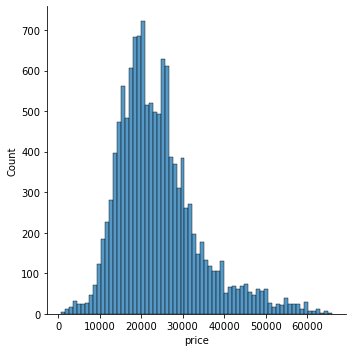

In [14]:
dataFrame.sort_values("price",ascending=False).head(20)#ascending=false büyük en başta
silinecekler=dataFrame.sort_values("price",ascending=False).iloc[131:]#131 tüm verinin %1i
print(silinecekler.describe())
plt.figure(figsize=(10,7))
sbn.displot(silinecekler["price"])

In [16]:
dataFrame.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [19]:
silinecekler.groupby("year").mean()["price"]

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [21]:
dataFrame[dataFrame.year==1970]
dataFrame=silinecekler
dataFrame=dataFrame[dataFrame.year!=1970]
dataFrame

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [22]:
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [26]:
dataFrame=dataFrame.drop("transmission",axis=1)


KeyError: "['transmission'] not found in axis"

<Figure size 720x504 with 0 Axes>

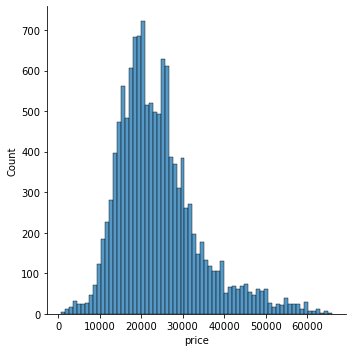

In [27]:
plt.figure(figsize=(10,7))
sbn.displot(dataFrame["price"])

en pahalı arabaların 131i silindi
1997 yılından aşağısı silindi
boş hücreler kontrol edildi
daha simetrik bir grafik çizildi

## veritemizleme iş bitti
şimdi model oluşturma

In [30]:
#y=ax+b
y=dataFrame["price"].values
x=dataFrame.drop("price",axis=1).values


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler=MinMaxScaler()

In [38]:
#scaler.fit_transform() öncesinde ilk fit sonra transform yapmak yerine aynı anda yaptık
x_train=scaler.fit_transform(x_train)

In [39]:
x_test=scaler.fit_transform(x_test)

In [40]:
# y leri transform etmeye gerek yok
from tensorflow.keras.models import Sequential#model oluşturma
from tensorflow.keras.layers import Dense#katman oluştuma

In [43]:
x_train.shape#(9090, 5) 2 sütun düşürdük 
y_train.shape#(9090,) 1 sütun var o da fiyat


(9090,)

In [45]:
model=Sequential()
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
#çıkış katmanı koy
model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

modeli eğitmek

In [47]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)#validation=doğrulama datası gibi-batch_size


Epoch 1/300
37/37 [==============================] - 0s 11ms/step - loss: 672146880.0000 - val_loss: 688107392.0000
Epoch 2/300
37/37 [==============================] - 0s 3ms/step - loss: 672134336.0000 - val_loss: 688089536.0000
Epoch 3/300
37/37 [==============================] - 0s 3ms/step - loss: 672107840.0000 - val_loss: 688048960.0000
Epoch 4/300
37/37 [==============================] - 0s 3ms/step - loss: 672044096.0000 - val_loss: 687947520.0000
Epoch 5/300
37/37 [==============================] - 0s 3ms/step - loss: 671881408.0000 - val_loss: 687688384.0000
Epoch 6/300
37/37 [==============================] - 0s 3ms/step - loss: 671475520.0000 - val_loss: 687045760.0000
Epoch 7/300
37/37 [==============================] - 0s 3ms/step - loss: 670500224.0000 - val_loss: 685570240.0000
Epoch 8/300
37/37 [==============================] - 0s 3ms/step - loss: 668434368.0000 - val_loss: 682641728.0000
Epoch 9/300
37/37 [==============================] - 0s 3ms/step - loss: 664551

37/37 [==============================] - 0s 3ms/step - loss: 72023776.0000 - val_loss: 71904536.0000
Epoch 73/300
37/37 [==============================] - 0s 3ms/step - loss: 71673536.0000 - val_loss: 71496216.0000
Epoch 74/300
37/37 [==============================] - 0s 3ms/step - loss: 71316424.0000 - val_loss: 71082328.0000
Epoch 75/300
37/37 [==============================] - 0s 3ms/step - loss: 70976464.0000 - val_loss: 70728480.0000
Epoch 76/300
37/37 [==============================] - 0s 3ms/step - loss: 70614360.0000 - val_loss: 70253152.0000
Epoch 77/300
37/37 [==============================] - 0s 3ms/step - loss: 70251608.0000 - val_loss: 69827024.0000
Epoch 78/300
37/37 [==============================] - 0s 3ms/step - loss: 69893976.0000 - val_loss: 69399520.0000
Epoch 79/300
37/37 [==============================] - 0s 3ms/step - loss: 69523840.0000 - val_loss: 69016480.0000
Epoch 80/300
37/37 [==============================] - 0s 5ms/step - loss: 69173032.0000 - val_loss: 6

37/37 [==============================] - 0s 3ms/step - loss: 36103748.0000 - val_loss: 35551532.0000
Epoch 144/300
37/37 [==============================] - 0s 3ms/step - loss: 35563124.0000 - val_loss: 35138896.0000
Epoch 145/300
37/37 [==============================] - 0s 3ms/step - loss: 35044212.0000 - val_loss: 34803476.0000
Epoch 146/300
37/37 [==============================] - 0s 3ms/step - loss: 34544812.0000 - val_loss: 34406856.0000
Epoch 147/300
37/37 [==============================] - 0s 3ms/step - loss: 34064572.0000 - val_loss: 34576264.0000
Epoch 148/300
37/37 [==============================] - 0s 3ms/step - loss: 33583064.0000 - val_loss: 33691760.0000
Epoch 149/300
37/37 [==============================] - 0s 3ms/step - loss: 33132028.0000 - val_loss: 33630696.0000
Epoch 150/300
37/37 [==============================] - 0s 3ms/step - loss: 32685690.0000 - val_loss: 33420962.0000
Epoch 151/300
37/37 [==============================] - 0s 3ms/step - loss: 32285556.0000 - val

37/37 [==============================] - 0s 3ms/step - loss: 21217696.0000 - val_loss: 25391234.0000
Epoch 215/300
37/37 [==============================] - 0s 3ms/step - loss: 21175788.0000 - val_loss: 25769800.0000
Epoch 216/300
37/37 [==============================] - 0s 3ms/step - loss: 21174252.0000 - val_loss: 25572996.0000
Epoch 217/300
37/37 [==============================] - 0s 3ms/step - loss: 21113464.0000 - val_loss: 25384090.0000
Epoch 218/300
37/37 [==============================] - 0s 3ms/step - loss: 21086814.0000 - val_loss: 25634338.0000
Epoch 219/300
37/37 [==============================] - 0s 3ms/step - loss: 21030022.0000 - val_loss: 24660054.0000
Epoch 220/300
37/37 [==============================] - 0s 3ms/step - loss: 21037006.0000 - val_loss: 24815672.0000
Epoch 221/300
37/37 [==============================] - 0s 3ms/step - loss: 21017068.0000 - val_loss: 24926988.0000
Epoch 222/300
37/37 [==============================] - 0s 3ms/step - loss: 20958738.0000 - val

37/37 [==============================] - 0s 3ms/step - loss: 19747244.0000 - val_loss: 24225186.0000
Epoch 286/300
37/37 [==============================] - 0s 3ms/step - loss: 19733224.0000 - val_loss: 23597228.0000
Epoch 287/300
37/37 [==============================] - 0s 3ms/step - loss: 19726768.0000 - val_loss: 23736892.0000
Epoch 288/300
37/37 [==============================] - 0s 3ms/step - loss: 19706554.0000 - val_loss: 23682576.0000
Epoch 289/300
37/37 [==============================] - 0s 3ms/step - loss: 19710470.0000 - val_loss: 23835218.0000
Epoch 290/300
37/37 [==============================] - 0s 3ms/step - loss: 19685792.0000 - val_loss: 23680070.0000
Epoch 291/300
37/37 [==============================] - 0s 3ms/step - loss: 19671042.0000 - val_loss: 23887500.0000
Epoch 292/300
37/37 [==============================] - 0s 3ms/step - loss: 19680356.0000 - val_loss: 23865510.0000
Epoch 293/300
37/37 [==============================] - 0s 4ms/step - loss: 19655532.0000 - val

In [48]:
kayıpveri=pd.DataFrame(model.history.history)

In [49]:
kayıpveri

,loss,val_loss
0,672146880.0,688107392.0
1,672134336.0,688089536.0
2,672107840.0,688048960.0
3,672044096.0,687947520.0
4,671881408.0,687688384.0
...,...,...
295,19607136.0,23559600.0
296,19601068.0,23953052.0
297,19592820.0,24015568.0
298,19568758.0,23511810.0


<AxesSubplot:>

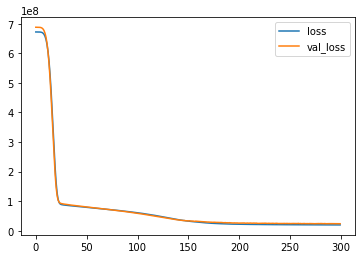

In [50]:
kayıpveri.plot()
#kayıp ve doğrulama kaybı benzer değilse over_fiting olabilir
#veri modelini baştan yap veya epochs'ı azalt

In [51]:
#tahminler ve bu tahminler için kıyaslama yapmamız gerek
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
tahmindizisi=model.predict(x_test)#
mean_absolute_error(y_test,tahmindizisi)
#3425.156 pournd ana fiyattan sapmış 
# %13lük bir fark var
#bu fark kabul edilir ise sorun yok
#kabul edilemezse verimizi daha fazla temizliyebiliriz,test_size veya split_size değiştirebiliriz,ipocks arttırılabilir neron sayımızı veya katman sayımızı değiştirebiliriz


3425.1566670500747

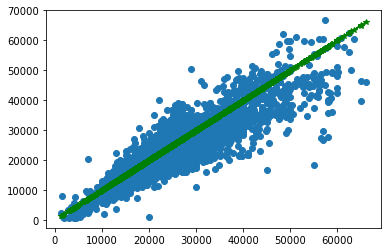

In [54]:
plt.scatter(y_test,tahmindizisi)
plt.plot(y_test,y_test,"g-*")

In [55]:
dataFrame.iloc[3]

year           2019.0
price         65000.0
mileage        3398.0
tax             145.0
mpg              27.2
engineSize        4.0
Name: 4727, dtype: float64

In [60]:
yeni_arabaseries=dataFrame.drop("price",axis=1).iloc[3]#pandas.serias


In [62]:
yeni_arabaseries=scaler.transform(yeni_arabaseries.values.reshape(-1,5))

In [63]:
model.predict(yeni_arabaseries)
#asıl değeri 65.000 ,tahmini değer=58.877,5

array([[58877.516]], dtype=float32)